In [1]:
import sys
sys.path.extend(['E:\\Sue\\parameciums'])

import pandas as pd
import numpy as np
import sqlalchemy as sa
import xcsc_tushare as ts

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter   ### 今天的主角
import seaborn as sns

from paramecium.database._postgres import get_sql_engine

import logging

logger = logging.getLogger()
logging.getLogger().setLevel(logging.ERROR)

sns.set(style='whitegrid',context='paper')

# 在我的 notebook 里，要设置下面两行才能显示中文
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei', *plt.rcParams['font.sans-serif']]
# 用来正常显示负号
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (8, 3.5)
plt.rcParams['axes.grid.axis'] = 'x'
for c in ('right', 'top'):#'bottom', 'left',
    plt.rcParams[f'axes.spines.{c}'] = False

def formatnum(x, pos):
    return '$%.1f$x$10^{4}$' % (x/10000)
formatter = FuncFormatter(formatnum)



2020-06-16 13:06:04,427 - root - WARNING - Environment variable NDSCHEDULER_SETTINGS_MODULE is undefined. Use default settings for now.
2020-06-16 13:06:04,427 - root - WARNING - Environment variable NDSCHEDULER_SETTINGS_MODULE is undefined. Use default settings for now.


In [2]:
bond_reg_result = pd.read_sql(
    """
    select f.wind_code, f.trade_dt, alpha, r2, sector_code
    from mf_factor_reg_bond5_w013 f
    inner join mf_org_sector_m mosm on f.trade_dt = mosm.trade_dt and f.wind_code=mosm.wind_code
    where substr(sector_code, 7, 2)='03'
    """,
    get_sql_engine(),
    parse_dates=['trade_dt']
)
bond_reg_result.head()


,wind_code,trade_dt,alpha,r2,sector_code
0,519748.OF,2020-01-23,0.001257,0.475720,2001010301000000
1,005725.OF,2020-01-23,0.001073,0.644382,2001010302000000
2,006387.OF,2020-01-23,0.000850,0.464812,2001010302000000
3,006516.OF,2020-01-23,0.000509,0.436198,2001010302000000
4,006542.OF,2020-01-23,0.001054,0.660875,2001010302000000


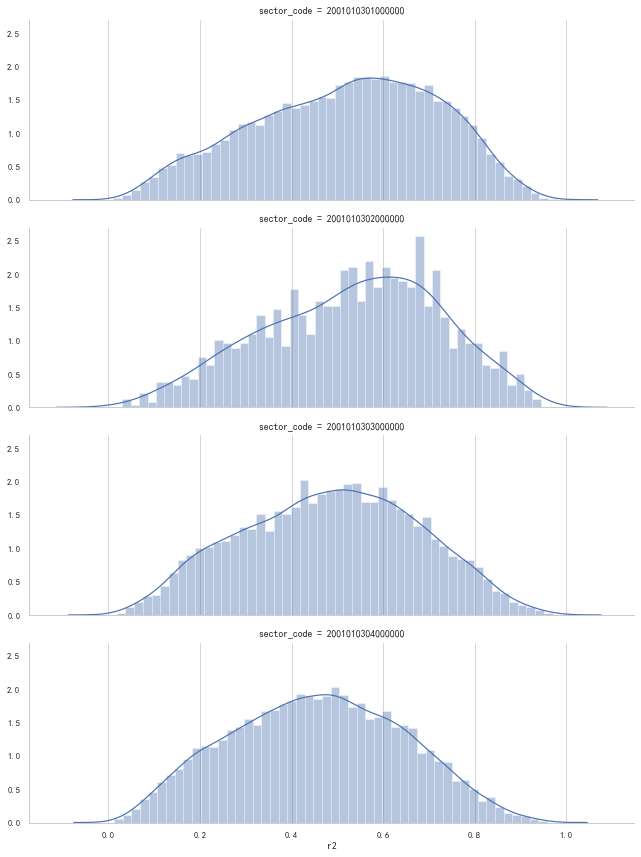

In [3]:
g = sns.FacetGrid(bond_reg_result, row="sector_code", aspect=3)
g.map(sns.distplot, "r2", bins=50)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


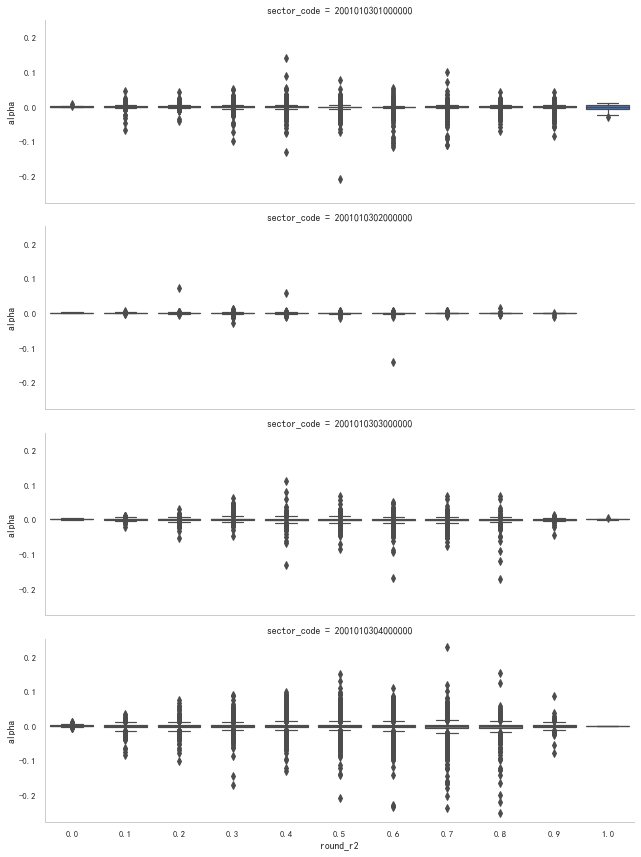

In [6]:
g = sns.FacetGrid(bond_reg_result.assign(round_r2=bond_reg_result['r2'].round(1)), row="sector_code", aspect=3)#, hue='trade_dt'
g.map(sns.boxplot, "round_r2", "alpha")#.set(
#     ylim=(bond_reg_result['alpha'].quantile(0.005), bond_reg_result['alpha'].quantile(0.995)),
# ).add_legend()

In [8]:
bond_reg_result.sort_values('alpha').tail()
# bond_reg_result['alpha'].quantile(0.95), bond_reg_result['alpha'].quantile(0.05)

,wind_code,trade_dt,alpha,r2,sector_code
39212,002421.OF,2019-09-30,0.129948,0.519523,2001010304000000
19971,004897.OF,2019-07-31,0.140913,0.356594,2001010301000000
4959,006140.OF,2019-09-30,0.150683,0.471833,2001010304000000
9318,630007.OF,2017-09-29,0.152719,0.822689,2001010304000000
9992,004222.OF,2019-08-30,0.227496,0.726050,2001010304000000


In [10]:
bond_reg_result.loc[lambda df: df['wind_code'].eq('202105.OF')]


,wind_code,trade_dt,alpha,r2,sector_code
208,202105.OF,2011-08-31,0.000121,0.799115,2001010304000000
210,202105.OF,2011-09-30,-0.000407,0.715239,2001010304000000
289,202105.OF,2014-01-30,0.000671,0.531649,2001010304000000
422,202105.OF,2015-10-30,0.000575,0.840088,2001010304000000
437,202105.OF,2016-01-29,0.000050,0.836127,2001010304000000
...,...,...,...,...,...
26449,202105.OF,2018-06-29,-0.000209,0.718092,2001010304000000
27140,202105.OF,2011-03-31,-0.000149,0.765702,2001010304000000
27308,202105.OF,2015-05-29,-0.000998,0.664965,2001010304000000
27318,202105.OF,2015-06-30,-0.001165,0.783560,2001010304000000
